*italicized text*#**SANDRA DERY-KUUZUME**


> Add blockquote




# #**Assignment Title: Analyzing Customer Behavior for E-commerce Insights**

The task is to analyze a dataset and gain actionable insights from the data that
could help the business improve sales, enhance customer engagement,
and personalize the shopping experience.

*italicized text*# Data Preprocessing

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("itzr1010/ecommerce-data-set")

# List contents of the directory to find the correct file
print(os.listdir(path))




['ECOMM DATA.xlsx - Orders.csv']


In [ ]:

csv_file = os.path.join(path, 'ECOMM DATA.xlsx - Orders.csv')

# Load the dataset
data = pd.read_csv(csv_file)

# Display first few rows of the data
print(data.head())

   ROW ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   26341   CA-2012-124891   31/7/2012   31/7/2012      Same Day    RH-19495   
1   26341    IN-2013-77878    5/2/2013    7/2/2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17/10/2013  18/10/2013   First Class    CR-12730   
3   13524  ES-2013-1579342   28/1/2013   30/1/2013   First Class    KM-16375   
4   47221     SG-2013-4320   5/11/2013   6/11/2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category  Sub-Category  \
0   TEC-AC-10003033  Technology

In [ ]:
#Display first 5 rows of code to verify
print(data.head())

   ROW ID         Order ID  Order Date   Ship Date     Ship Mode Customer ID  \
0   26341   CA-2012-124891   31/7/2012   31/7/2012      Same Day    RH-19495   
1   26341    IN-2013-77878    5/2/2013    7/2/2013  Second Class    JR-16210   
2   25330    IN-2013-71249  17/10/2013  18/10/2013   First Class    CR-12730   
3   13524  ES-2013-1579342   28/1/2013   30/1/2013   First Class    KM-16375   
4   47221     SG-2013-4320   5/11/2013   6/11/2013      Same Day     RH-9495   

      Customer Name      Segment           City            State  ...  \
0       Rick Hansen     Consumer  New York City         New York  ...   
1     Justin Ritter    Corporate     Wollongong  New South Wales  ...   
2      Craig Reiter     Consumer       Brisbane       Queensland  ...   
3  Katherine Murray  Home Office         Berlin           Berlin  ...   
4       Rick Hansen     Consumer          Dakar            Dakar  ...   

         Product ID    Category  Sub-Category  \
0   TEC-AC-10003033  Technology

In [ ]:
#List all the columns in the file
print(data.columns)

Index(['ROW ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Market', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Shipping Cost', 'Profit', 'Order Priority'],
      dtype='object')


## Data Cleaning by Handling Null Values and Duplicates

In [ ]:
#Handling Duplicates
data.drop_duplicates(inplace=True)
#Handling Null Values
data.dropna(inplace=True)
print(data)

       ROW ID        Order ID  Order Date   Ship Date       Ship Mode  \
0       26341  CA-2012-124891   31/7/2012   31/7/2012        Same Day   
8       40155  CA-2014-135909  14/10/2014  21/10/2014  Standard Class   
9       40936  CA-2012-116638   28/1/2012   31/1/2012    Second Class   
10      34577  CA-2011-102988    5/4/2011    9/4/2011    Second Class   
16      36178  CA-2014-143567   3/11/2014   6/11/2014    Second Class   
...       ...             ...         ...         ...             ...   
51270   38414  CA-2011-143168  18/10/2011  23/10/2011    Second Class   
51276   31558  US-2014-155299    9/6/2014   13/6/2014  Standard Class   
51277   37361  CA-2012-111780  25/12/2012  30/12/2012    Second Class   
51286   35398  US-2014-102288   20/6/2014   24/6/2014  Standard Class   
51287   40470  US-2013-155768   2/12/2013   2/12/2013        Same Day   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Consumer  New Yo

Since all the states are found in the United State, the 'Country' column is unnecessary

In [ ]:
#Drop redundant columns
data.drop(['Country','Market'],axis=1,inplace=True)

In [ ]:
#List all the columns after the drop
print(data.columns)

Index(['ROW ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Shipping Cost',
       'Profit', 'Order Priority'],
      dtype='object')


In [ ]:
data.describe()

,ROW ID,Postal Code,Sales,Quantity,Discount,Shipping Cost,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,36292.903942,55190.379428,229.858001,3.789574,0.156203,23.831678,28.656896
std,2886.604139,32063.693350,623.245101,2.225110,0.206452,58.962848,234.260108
min,26341.000000,1040.000000,0.444000,1.000000,0.000000,0.010000,-6599.978000
25%,33795.250000,23223.000000,17.280000,2.000000,0.000000,1.490000,1.728750
50%,36293.500000,56430.500000,54.490000,3.000000,0.200000,5.100000,8.666500
75%,38791.750000,90008.000000,209.940000,5.000000,0.200000,19.985000,29.364000
max,41290.000000,99301.000000,22638.480000,14.000000,0.800000,933.570000,8399.976000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 0 to 51287
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ROW ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   City            9994 non-null   object 
 9   State           9994 non-null   object 
 10  Postal Code     9994 non-null   float64
 11  Region          9994 non-null   object 
 12  Product ID      9994 non-null   object 
 13  Category        9994 non-null   object 
 14  Sub-Category    9994 non-null   object 
 15  Product Name    9994 non-null   object 
 16  Sales           9994 non-null   float64
 17  Quantity        9994 non-null   int64

In [ ]:
data.dtypes


,0
ROW ID,int64
Order ID,object
Order Date,object
Ship Date,object
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
City,object
State,object


# Data Analysis

## Mutual Information

In [ ]:
#Selecting only numerical columns for feature selection
numerical_data = data.select_dtypes(include=np.number)


In [ ]:
#Defining my X and Y and making sales my target variable
X = numerical_data.drop('Sales', axis=1)
Y = numerical_data['Sales']

In [ ]:

from sklearn.feature_selection import mutual_info_regression

#Calculating mutual information
mi_scores= mutual_info_regression(X,Y)

#Creating a DataFrame to display the mutual information
mi_scores=pd.Series(mi_scores,name='MI Scores',index=X.columns)
mi_scores=mi_scores.sort_values(ascending=False)

#Printing the top features based on the mi scores
print("Top features using Mi score")
print(mi_scores)

Top features using Mi score
Profit           1.969988
Shipping Cost    1.036870
Quantity         0.450658
Discount         0.300724
Postal Code      0.030988
ROW ID           0.001875
Name: MI Scores, dtype: float64


In [ ]:
#Normalization of X values
X_mean=X.mean()
X_std=X.std()
X_norm=(X-X_mean)/X_std

In [ ]:
#Normalization of Y values
Y_mean=Y.mean()
Y_std=Y.std()
Y_norm=(Y-Y_mean)/Y_std

In [ ]:

#Calculating mutual information of normalized values
mi_scores= mutual_info_regression(X_norm,Y_norm)

#Creating a DataFrame to display the mutual information
mi_scores=pd.Series(mi_scores,name='MI Scores',index=X_norm.columns)
mi_scores=mi_scores.sort_values(ascending=False)

#Printing the top features based on the mi scores
print("Top features for the normalized values using Mi score")
print(mi_scores)

Top features for the normalized values using Mi score
Profit           1.970580
Shipping Cost    1.038453
Quantity         0.455687
Discount         0.297813
Postal Code      0.033222
ROW ID           0.001854
Name: MI Scores, dtype: float64


For the Mutual Information Scores normalization has negligble impact on the MI scores. Postal Code and ROW ID will be dropped since they have very little predictive power

In [ ]:
#Printing Data
print(data)

       ROW ID        Order ID  Order Date   Ship Date       Ship Mode  \
0       26341  CA-2012-124891   31/7/2012   31/7/2012        Same Day   
8       40155  CA-2014-135909  14/10/2014  21/10/2014  Standard Class   
9       40936  CA-2012-116638   28/1/2012   31/1/2012    Second Class   
10      34577  CA-2011-102988    5/4/2011    9/4/2011    Second Class   
16      36178  CA-2014-143567   3/11/2014   6/11/2014    Second Class   
...       ...             ...         ...         ...             ...   
51270   38414  CA-2011-143168  18/10/2011  23/10/2011    Second Class   
51276   31558  US-2014-155299    9/6/2014   13/6/2014  Standard Class   
51277   37361  CA-2012-111780  25/12/2012  30/12/2012    Second Class   
51286   35398  US-2014-102288   20/6/2014   24/6/2014  Standard Class   
51287   40470  US-2013-155768   2/12/2013   2/12/2013        Same Day   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Consumer  New Yo

##Correlation Analysis
  

In [ ]:
#Calculating correlation Matrix
correlation_matrix=numerical_data.corr()

#Selecting the top correlated features with the target variable
target_correlation=correlation_matrix['Sales'].sort_values(ascending=False)
print(target_correlation)

Sales            1.000000
Shipping Cost    0.677279
Profit           0.479064
Quantity         0.200795
ROW ID          -0.002047
Postal Code     -0.023854
Discount        -0.028190
Name: Sales, dtype: float64


Based on the data provided by the correlation matrix, Sales has a maximum correlation with its self.
Shipping Cost and Profit have high positive correlation meaning they may be important predictors.
ROW ID , Postal Code and Discount have high negative correlation meaning the same Sales increases, these values decrease   

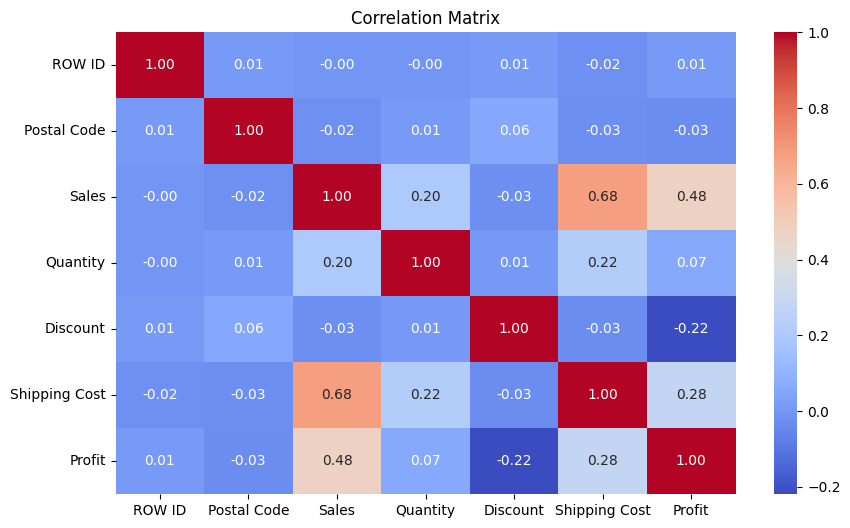

In [ ]:
#Plotting graph
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# The heatmap gives a visual representation of the correlation between the numeric features.Based on the graph, there is no correlation between Sales and the ROW ID and between Quantity and ROW ID.

There is a negative correlation between Shipping Cost and Discount as well as between Profit and Discount.This means that Discount increases when Profit and Shipping Cost decreases.

However, there is a high positive correlation between Sales and Shipping cost as well as between Sales and Profit.This means that when customers purchase more products, there is an increase in profit and shipping cost.


## Recursive Feature Elimination (RFE)

>RFE iteratively eliminates the least relevant features according to a model's performance, finally choosing the most informative feature









In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 0 to 51287
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ROW ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   City            9994 non-null   object 
 9   State           9994 non-null   object 
 10  Postal Code     9994 non-null   float64
 11  Region          9994 non-null   object 
 12  Product ID      9994 non-null   object 
 13  Category        9994 non-null   object 
 14  Sub-Category    9994 non-null   object 
 15  Product Name    9994 non-null   object 
 16  Sales           9994 non-null   float64
 17  Quantity        9994 non-null   int64

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator= LinearRegression()

#Number of features to select
num_of_features=20

#Getting selected features
rfe= RFE(estimator,n_features_to_select=num_of_features)
rfe.fit(X,Y)

#Performing RFE
selected_features=X.columns[rfe.support_]
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['ROW ID', 'Postal Code', 'Quantity', 'Discount', 'Shipping Cost',
       'Profit'],
      dtype='object')


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=20 > n_features=6. There will be no feature selection and all features will be kept.
  warnings.warn(


bold text## Final Selection

Based on the knowlege from the ecommerce dataset the sales and the observation of the tools above, the following columns are likely to be important features in predicting customer churn, product
 recommendations, or sales forecasting.

In [ ]:
important_columns=['ROW ID', 'Postal Code', 'Quantity', 'Discount', 'Shipping Cost',
       'Profit']
print(important_columns)

['ROW ID', 'Postal Code', 'Quantity', 'Discount', 'Shipping Cost', 'Profit']


In [ ]:
data[important_columns].info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 0 to 51287
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ROW ID         9994 non-null   int64  
 1   Postal Code    9994 non-null   float64
 2   Quantity       9994 non-null   int64  
 3   Discount       9994 non-null   float64
 4   Shipping Cost  9994 non-null   float64
 5   Profit         9994 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 546.5 KB


In [ ]:
data[important_columns].describe()

,ROW ID,Postal Code,Quantity,Discount,Shipping Cost,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,36292.903942,55190.379428,3.789574,0.156203,23.831678,28.656896
std,2886.604139,32063.693350,2.225110,0.206452,58.962848,234.260108
min,26341.000000,1040.000000,1.000000,0.000000,0.010000,-6599.978000
25%,33795.250000,23223.000000,2.000000,0.000000,1.490000,1.728750
50%,36293.500000,56430.500000,3.000000,0.200000,5.100000,8.666500
75%,38791.750000,90008.000000,5.000000,0.200000,19.985000,29.364000
max,41290.000000,99301.000000,14.000000,0.800000,933.570000,8399.976000


##Data Visualization

###Box Plots

Plotting Box Plots for Numerical Features
I plotted vertical box plots for each numerical feature in important_columns to visually examine the distribution, central tendency, and spread of each feature's values. Here's why this visualization was important:


*   The box plots provided a clear visual representation of the distribution of numerical data, including median, quartiles, and potential outliers.
*   : By plotting multiple box plots side by side, I could compare the distributions of different features within our dataset.



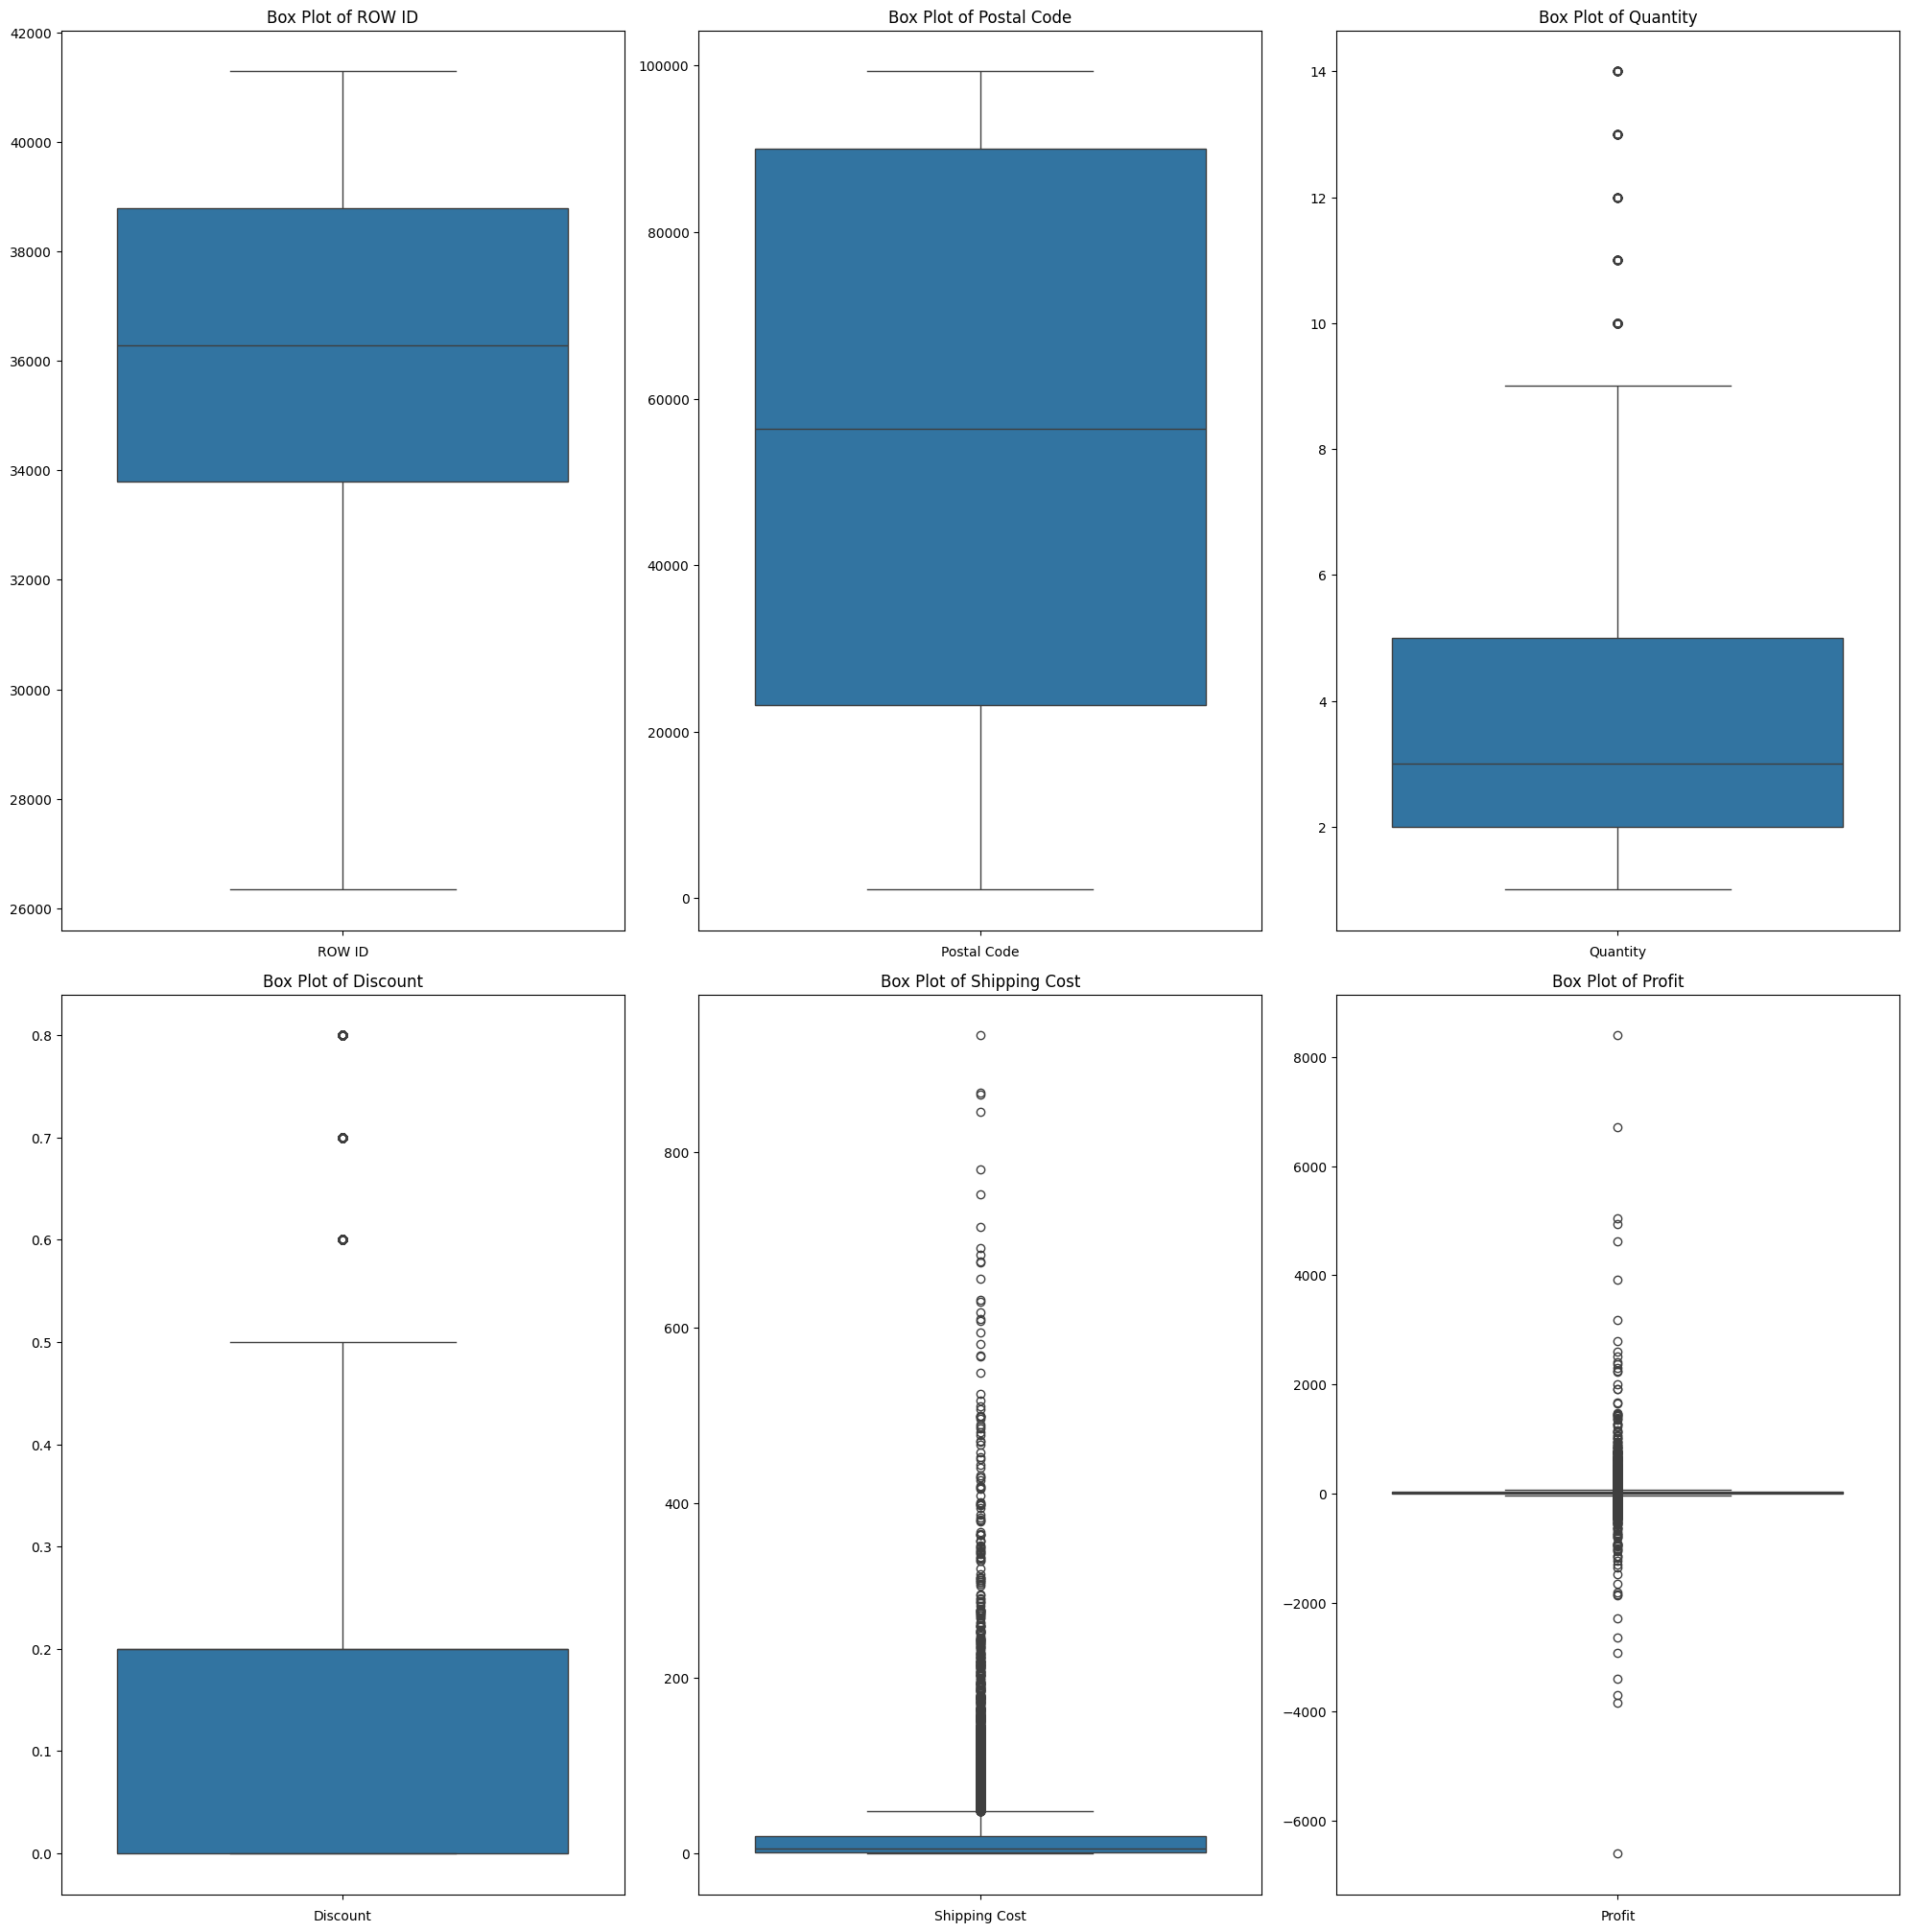

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 30))
rows = len(important_columns) // 3 + 1
cols = 3

# Plot vertical box plots for numerical features in important_columns
for i, feature in enumerate(important_columns, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.ylabel('')
    plt.xlabel(feature)
    plt.tight_layout()

plt.show()

Conclusion:


*   For the box plot of ROW ID, the value range is approximately from  26,000 to 42,000. No major outliers is shown.

*   For the box plot of Postal Code, the value range is approxiately between 2000 and 9000. No major outliers is observed.

*    For the box plot of Quantity, the value range is approximately between 2 to 5, some outliers starting after 8 up to 14 are observed. This shows that majority of customer purchases are 2 to 5 units but on few occassions a customer can order 8-14 units of an item.

*    For the box plot of Discount, the value range is approximately between 0.0 and 0.2, a few outliers starting at 0.6 up to 0.8 are observed.This inidicates that majority of the discounts are between 0 and 0.2 and those above 0.6 are rare indicating specicial discounts.


*    For the box plot of Shipping Cost, the range is concentrated close to zero, there is a high concentration of outliers with a feww exceeding 800. This indicates that majority of shpping costs are low but a few are exceptionally high.

*    For the box plot of Profit, the range is between -4000 and +8000, this indicates that the business has experienced both profits and losses.







###Histogram

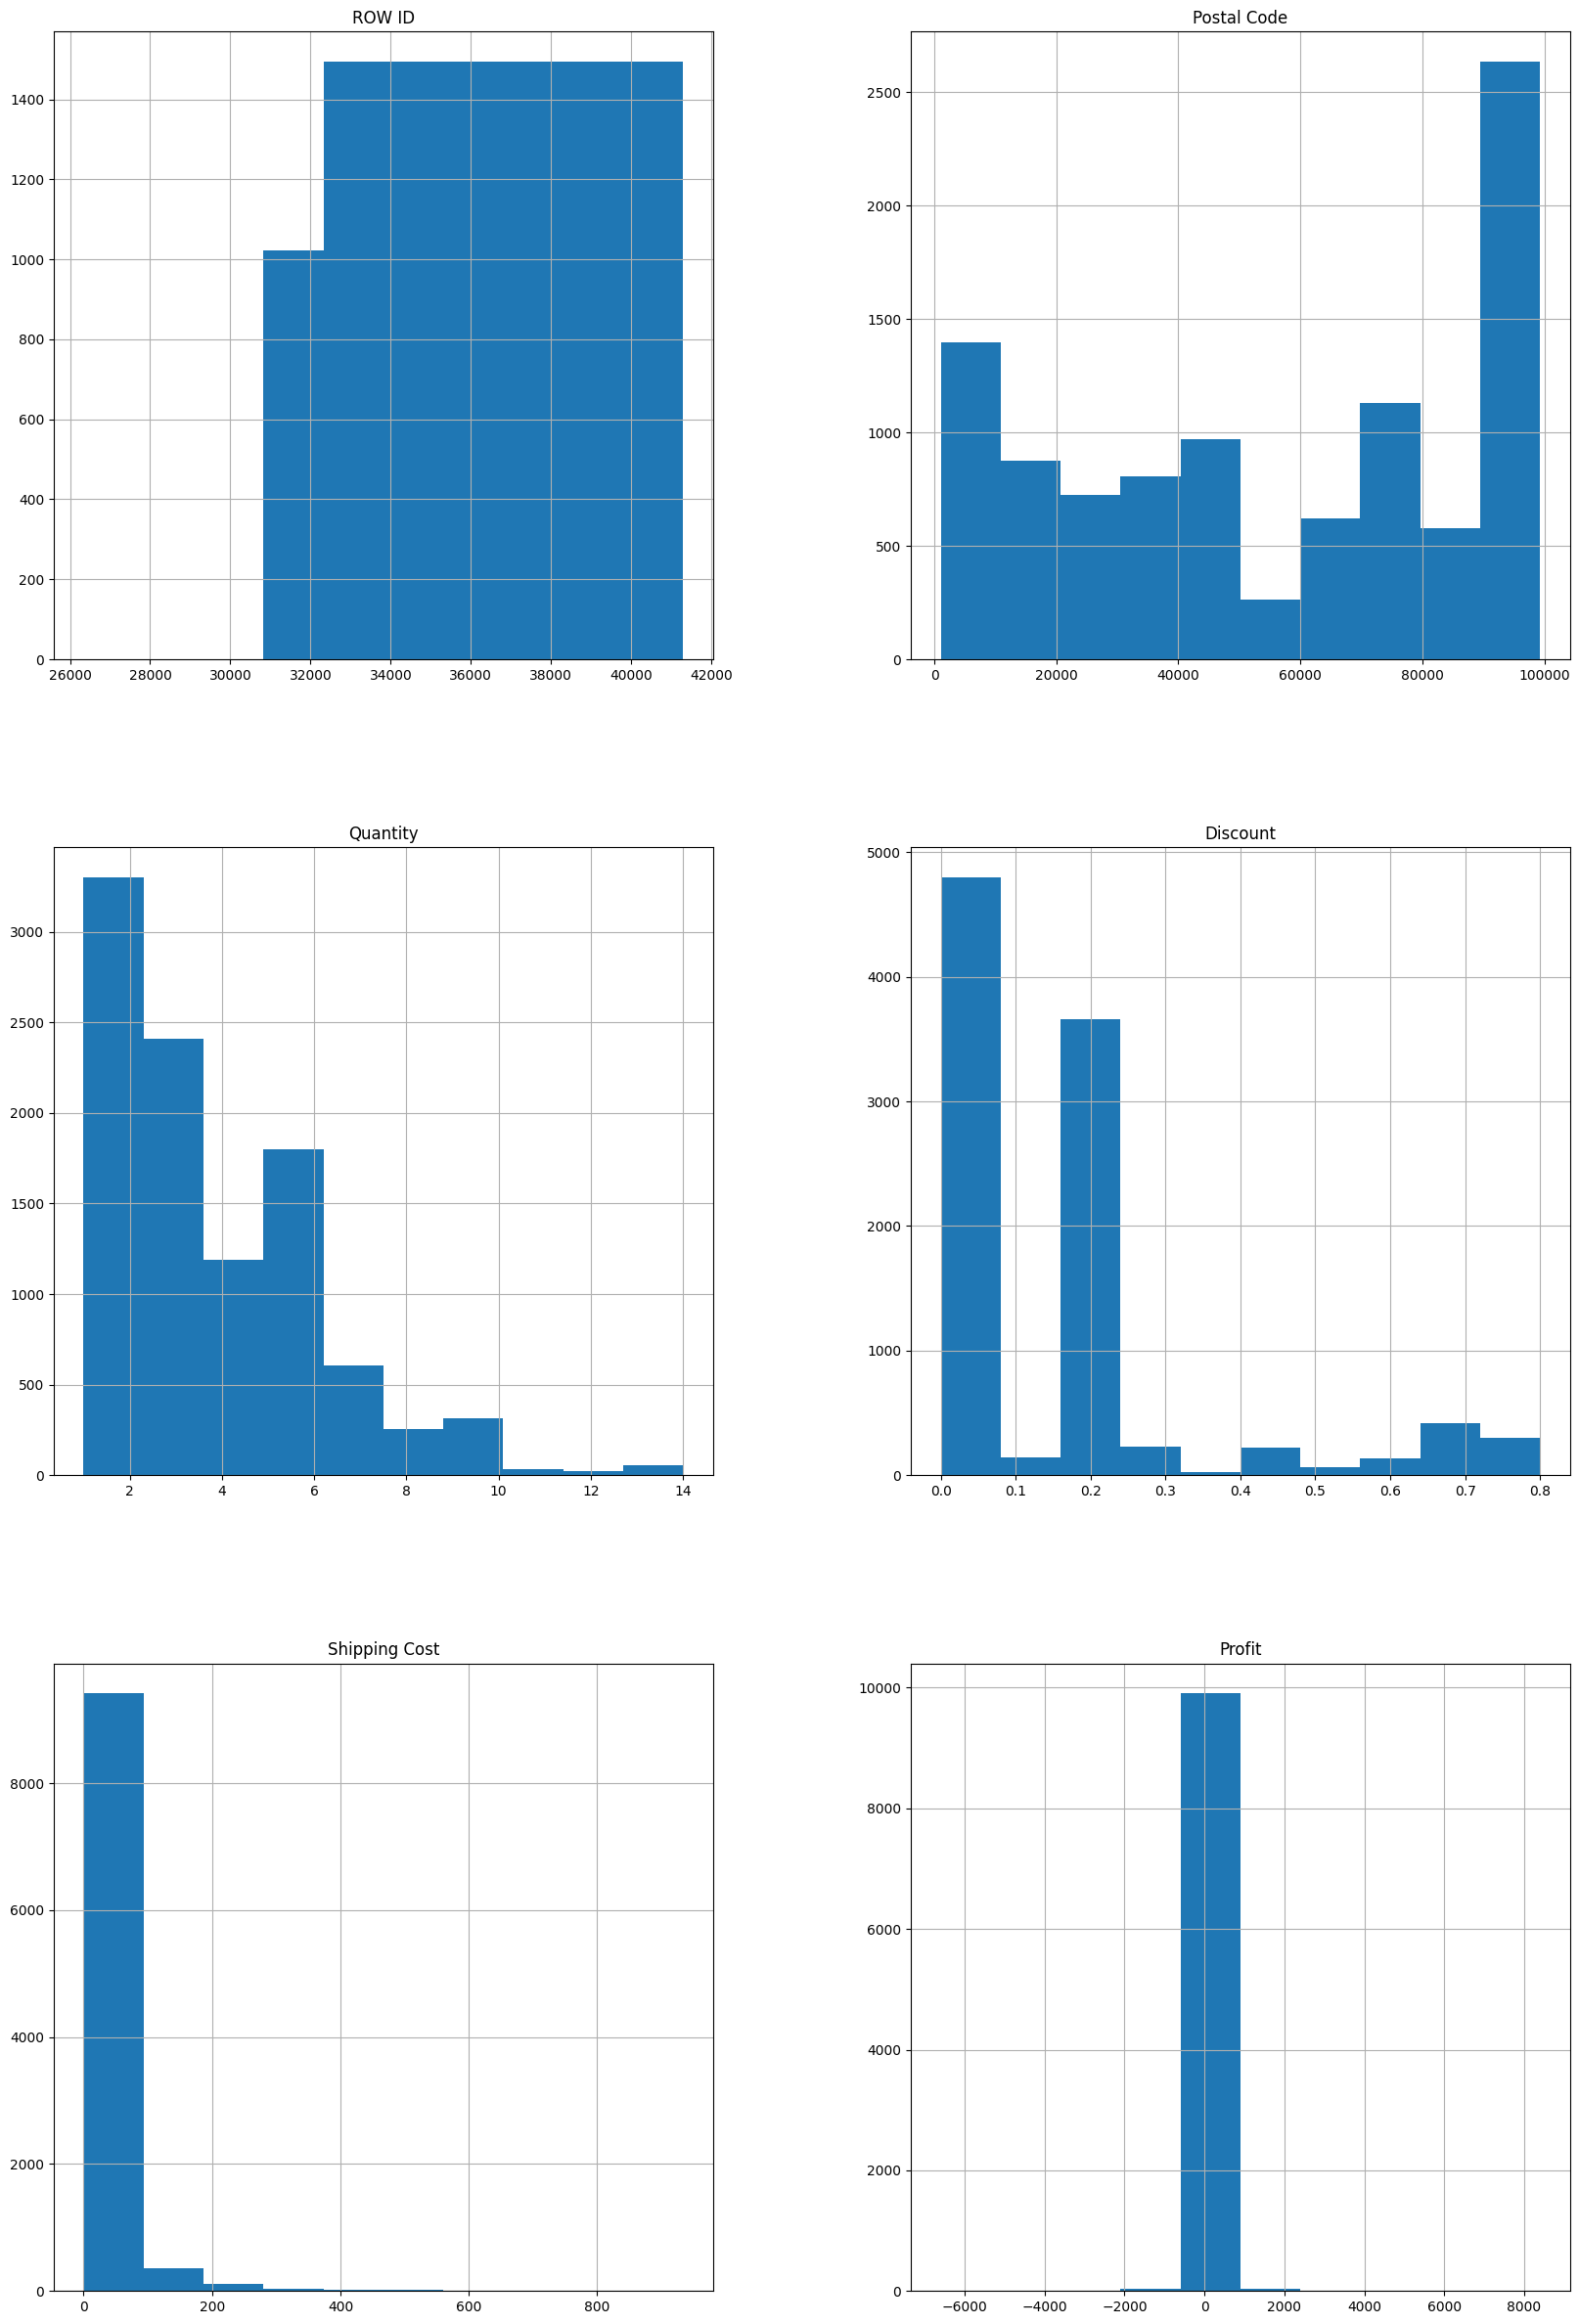

In [ ]:
data[important_columns].hist(figsize=(20, 30))
plt.show()


Conclusion:


*   For the histogram for the Row ID, there is even distribution and the values lie between 31000 and 41000.This indicates that the ROW ID values keep on increasing.

*   For the histogram of the Postal Code, there are significant spikes, especially near 0 and 100,000. There is a very high frequency between 90,000 and 100,000 indicating most customers are people who live within a certain area.

*   For the histogram of the Quantity, there is a high frequency greater than 3,000 between the ranges of 1-4 and a fignificantly low frequency for the values greater than 10. This indicates than most customers tend to buy 1-3 quantities of a particular product and rarely buy more than 10 quantities of a product.  

*   For the histogram of the Discount, there is a high frequency for values between the range 0.0 to 0.25 and there is significantly low freqencies for values greater than 0.25. This indicates than most discount values for products at between 0 to 25% off and the ecommerce might have higher discounted sales during special days like holidays or for clearance sales.

*   For the histogram of the Shipping Cost, there is a high frequency between 0-100 and a significant drop in frequency after 200. This indicates than the cost of shipping is usualy between 0-100 and occassionally more expensive than that.

*   For the histogram of the Profit, there is a high frequency between -1000 and +1000.This indicates that many transactions break even or result in  both profits and losses.






###Scatter Plot

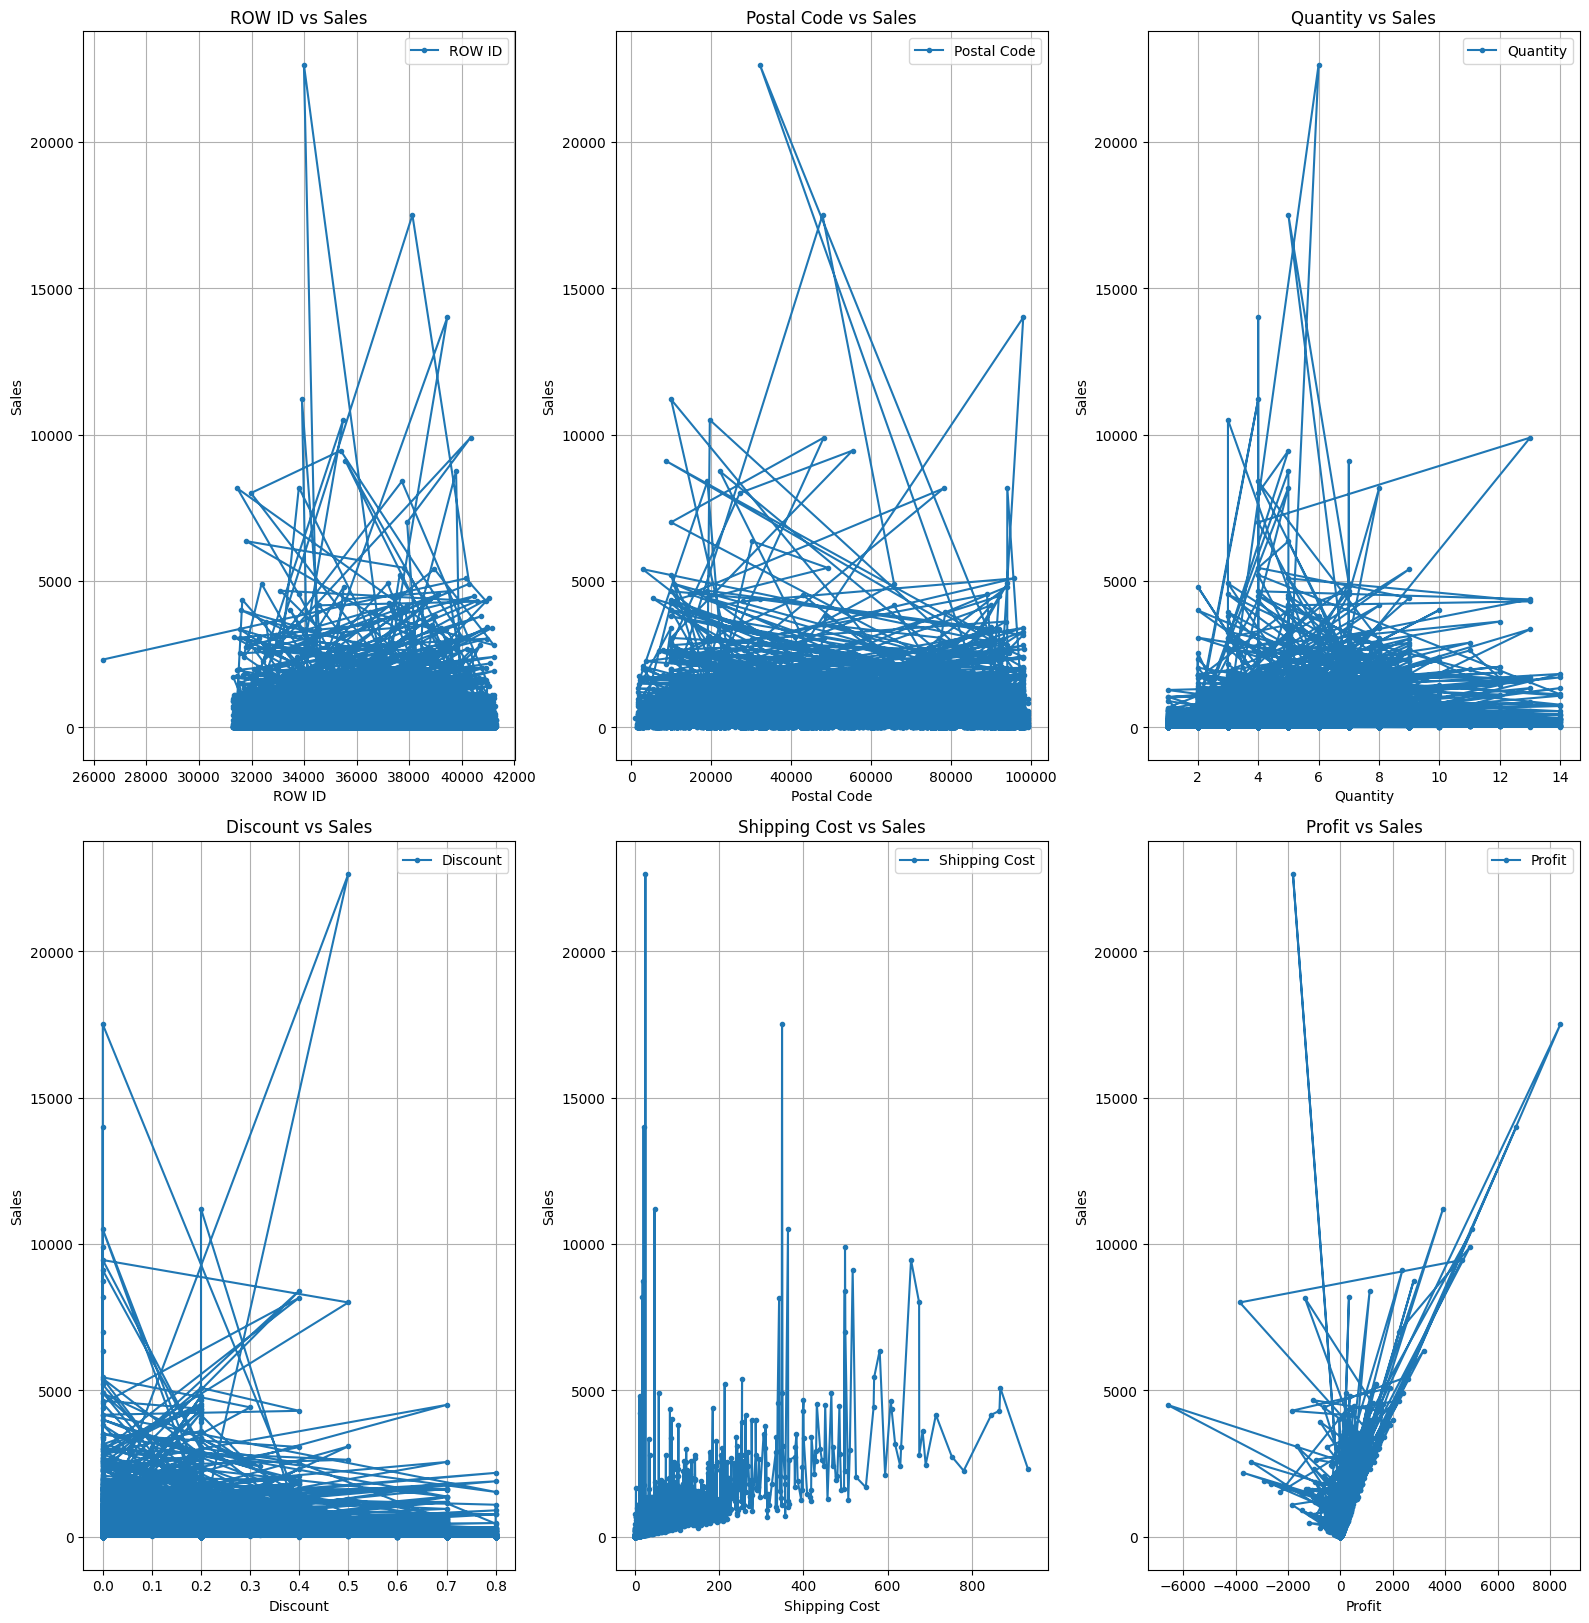

In [ ]:

plt.figure(figsize=(16, 24))

# Plotting each feature against the Sales on separate subplots
for i, feature in enumerate(important_columns):
    if feature != 'Sales':
        plt.subplot(len(important_columns) // 3 + 1, 3, i + 1)
        plt.plot(data[feature], data['Sales'], marker='o', linestyle='-', markersize=3, label=feature)
        plt.xlabel(feature)
        plt.ylabel('Sales')
        plt.title(f'{feature} vs Sales')
        plt.legend()
        plt.grid(True)

plt.tight_layout()
plt.show()


Conclusion:



*   For Postal Code VS Sales, some areas have higher sales than others. This means that those areas have bigger purchases or more sales

*   For Quantity VS Sales, there is a significant spike in sales between quantities 2 to 6. This means that most products sold were in quuantities 2-6.But occassionally a product would be sold at a greater quantity.

*   For Discount VS Sales, sales were high when discount was at 0, sales was also high at 0.7 indicating special promotions.

*   For Shipping Cost VS Sales, shipping cost increases as sales increases but the significant spike around 0 indicates than most sales had low shipping cost.

*   For Profit VS Sales, the spikes indiates that an increase in sales results to an increase in profit. Sales and Profit grow together.










# Feature Engineering

##Creating a Month Column

In [ ]:
# Converting 'Order Date' to datetime objects with the specified format
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')

# Extracting the month and create the 'Month' column
data['Month'] = data['Order Date'].dt.month



In [ ]:
print(data)

       ROW ID        Order ID Order Date   Ship Date       Ship Mode  \
0       26341  CA-2012-124891 2012-07-31   31/7/2012        Same Day   
8       40155  CA-2014-135909 2014-10-14  21/10/2014  Standard Class   
9       40936  CA-2012-116638 2012-01-28   31/1/2012    Second Class   
10      34577  CA-2011-102988 2011-04-05    9/4/2011    Second Class   
16      36178  CA-2014-143567 2014-11-03   6/11/2014    Second Class   
...       ...             ...        ...         ...             ...   
51270   38414  CA-2011-143168 2011-10-18  23/10/2011    Second Class   
51276   31558  US-2014-155299 2014-06-09   13/6/2014  Standard Class   
51277   37361  CA-2012-111780 2012-12-25  30/12/2012    Second Class   
51286   35398  US-2014-102288 2014-06-20   24/6/2014  Standard Class   
51287   40470  US-2013-155768 2013-12-02   2/12/2013        Same Day   

      Customer ID     Customer Name      Segment           City  \
0        RH-19495       Rick Hansen     Consumer  New York City   
8

##Checking Averages Sales Made In A Month

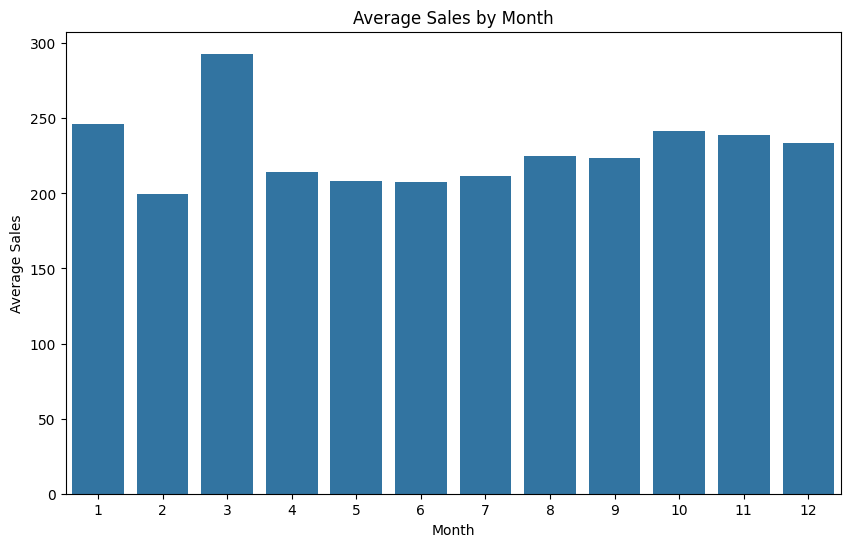

In [ ]:
# Calculating the average sales per segment
average_discount_per_month = data.groupby('Month')['Sales'].mean().reset_index()

# Plotting the average sales per segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Sales', data=average_discount_per_month)
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.show()

The ecommerce experiences the most sales in March and the least amount of sales in February.The amount is sales is stable from May to June before increasing again in July.However the average amount of sales is greater thaan 200 all year round.

##Checking Average Sales Per State

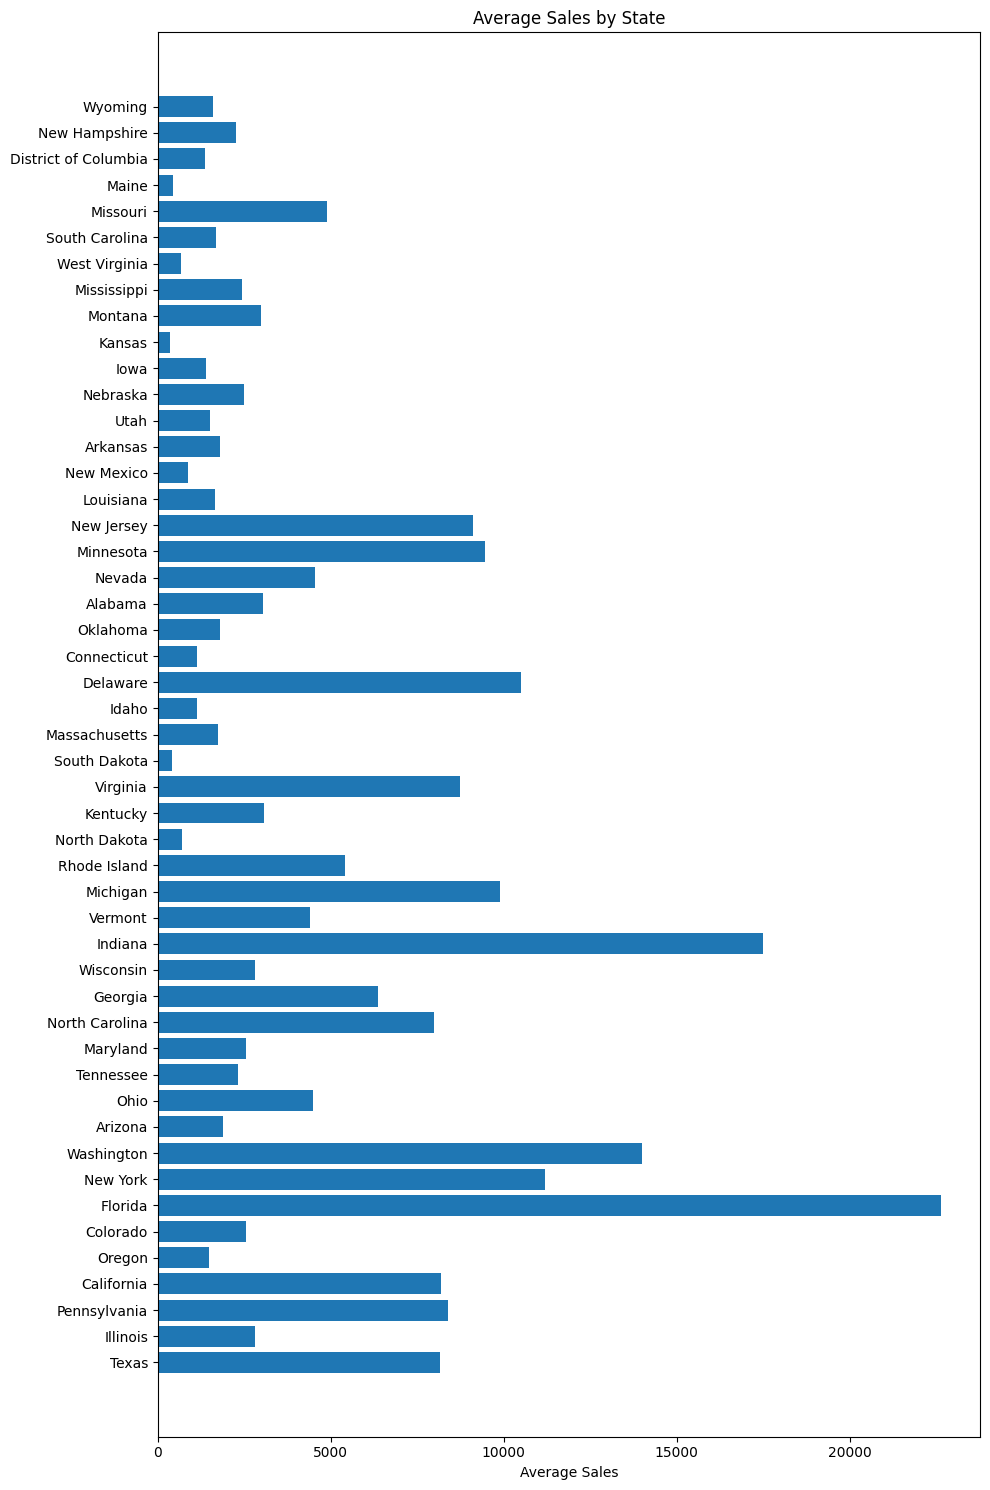

In [ ]:


#Plotting Average Sales Per State
sorted_data = data.sort_values('Sales')
states = sorted_data['State']
avg_sales = sorted_data['Sales']

plt.figure(figsize=(10, 15))
plt.barh(states, avg_sales)
plt.xlabel('Average Sales')
plt.title('Average Sales by State')
plt.tight_layout()
plt.show()


The largest amount of purchases come from Florida and the smallest amount of sales come from Kansas. These means that a large amount of customers live in Florida and the business does not get much business in states such as South Dakota, North Dakota, Kansas and Maine.

##Average Sales Per Segment

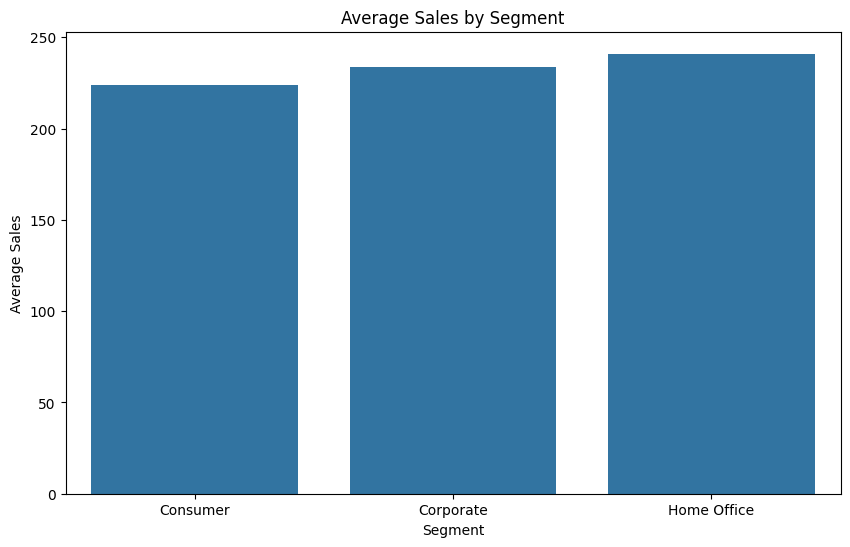

In [ ]:
# Calculate the average sales per segment
average_sales_per_segment = data.groupby('Segment')['Sales'].mean().reset_index()

# Plot the average sales per segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Sales', data=average_sales_per_segment)
plt.title('Average Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Sales')
plt.xticks(rotation=0)
plt.show()

In Conclusion:

The average amount of sales in all three segments is greater than 200. Consumer segment has the least amount of sales and Home Segment has the largest average sales amount.

#Predictive Modelling

##Splitting Data into Testing and Training

In [ ]:
from sklearn.model_selection import train_test_split

# Initial splitting into training + validation and testing sets
data_train_val, data_test = train_test_split(data, test_size=0.2, random_state=42)

# Further splitting training + validation into training and validation sets
data_train, data_val = train_test_split(data_train_val, test_size=0.25, random_state=42)

In [ ]:



x_train = data_train[important_columns]
y_train = data_train['Sales']

x_val = data_val[important_columns]
y_val = data_val['Sales']

x_test = data_test[important_columns]
y_test = data_test['Sales']


##Getting the Best Hyperparameters

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Create a smaller subset of the data
subset_fraction = 0.1  # Adjust this as needed
x_train_subset = x_train.sample(frac=subset_fraction, random_state=42)
y_train_subset = y_train.loc[x_train_subset.index]

# Split the dataset into training and validation sets
x_train_final, x_val, y_train_final, y_val = train_test_split(x_train_subset, y_train_subset, test_size=0.2, random_state=42)

# Define your parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform Randomized Search with Cross-Validation
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_grid,
    n_iter=50,
    cv=3,
    n_jobs=-1,
    scoring='neg_mean_absolute_error',
    verbose=2,
    random_state=42
)

# Fit the model
rf_random_search.fit(x_train_final, y_train_final)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
39 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [ ]:
# Getting the best parameters and the best model
best_params = rf_random_search.best_params_
best_rf = rf_random_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 15}


##Random Forest Regressor

### Training the RandomForestRegressor with the best **hyperparameters**

In [ ]:

best_rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_leaf=2,
                      random_state=42)

In [ ]:
# Making predictions on the validation data
y_val_pred = best_rf.predict(x_val)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Evaluating performance metrics on the validation data
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Random Forest - Validation MAE: {val_mae:.4f}, MSE: {val_mse:.4f}, RMSE: {val_rmse:.4f}, R²: {val_r2:.4f}")

Random Forest - Validation MAE: 40.3711, MSE: 6185.5051, RMSE: 78.6480, R²: 0.9940


In [ ]:
forest_pred = best_rf.predict(x_val)
print(best_rf.score(x_train,y_train))
print(best_rf.score(x_val,y_val))

rmse = mean_squared_error(y_val,y_val_pred)
print(rmse)

0.8458937323425298
0.9940269423266459
6185.505070223925


In [ ]:

y_test_pred = best_rf.predict(x_test)

In [ ]:
# Evaluating performance metrics on the test data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)



print(f"Random Forest - Test MAE: {test_mae:.4f}, MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, R²: {test_r2:.4f}")

Random Forest - Test MAE: 83.1297, MSE: 96691.0627, RMSE: 310.9519, R²: 0.7574


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error

# Random Forest results

rf_results = pd.DataFrame(rf_random_search.cv_results_)
rf_top_params_rf = rf_results.nlargest(10, 'mean_test_score')[['params', 'mean_test_score']]
rf_top_params_rf['MAE'] = -rf_top_params_rf['mean_test_score']  # Negate for MAE

In [ ]:
def abbreviate_params(params):
    return ', '.join(f'{k}={v}' for k, v in params.items())

In [ ]:
import matplotlib.pyplot as plt

# Function to plot model performance using a legend
def plot_model_performance_with_legend(top_params, model_name, abbreviate_params):
    plt.figure(figsize=(20, 10))
    # Bar plot for MAE values
    bars = plt.bar(range(len(top_params)), top_params['MAE'], color='blue')

    # Adding labels to bars using the abbreviated parameter sets
    for bar, params in zip(bars, top_params['params']):
        bar.set_label(abbreviate_params(params))

    plt.xlabel('Top 10 Parameter Sets')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title(f'{model_name} Performance for Top 10 Parameter Sets')

    # Adding the legend outside the plot (bbox_to_anchor was misspelled)
    plt.legend(title='Parameter Sets', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


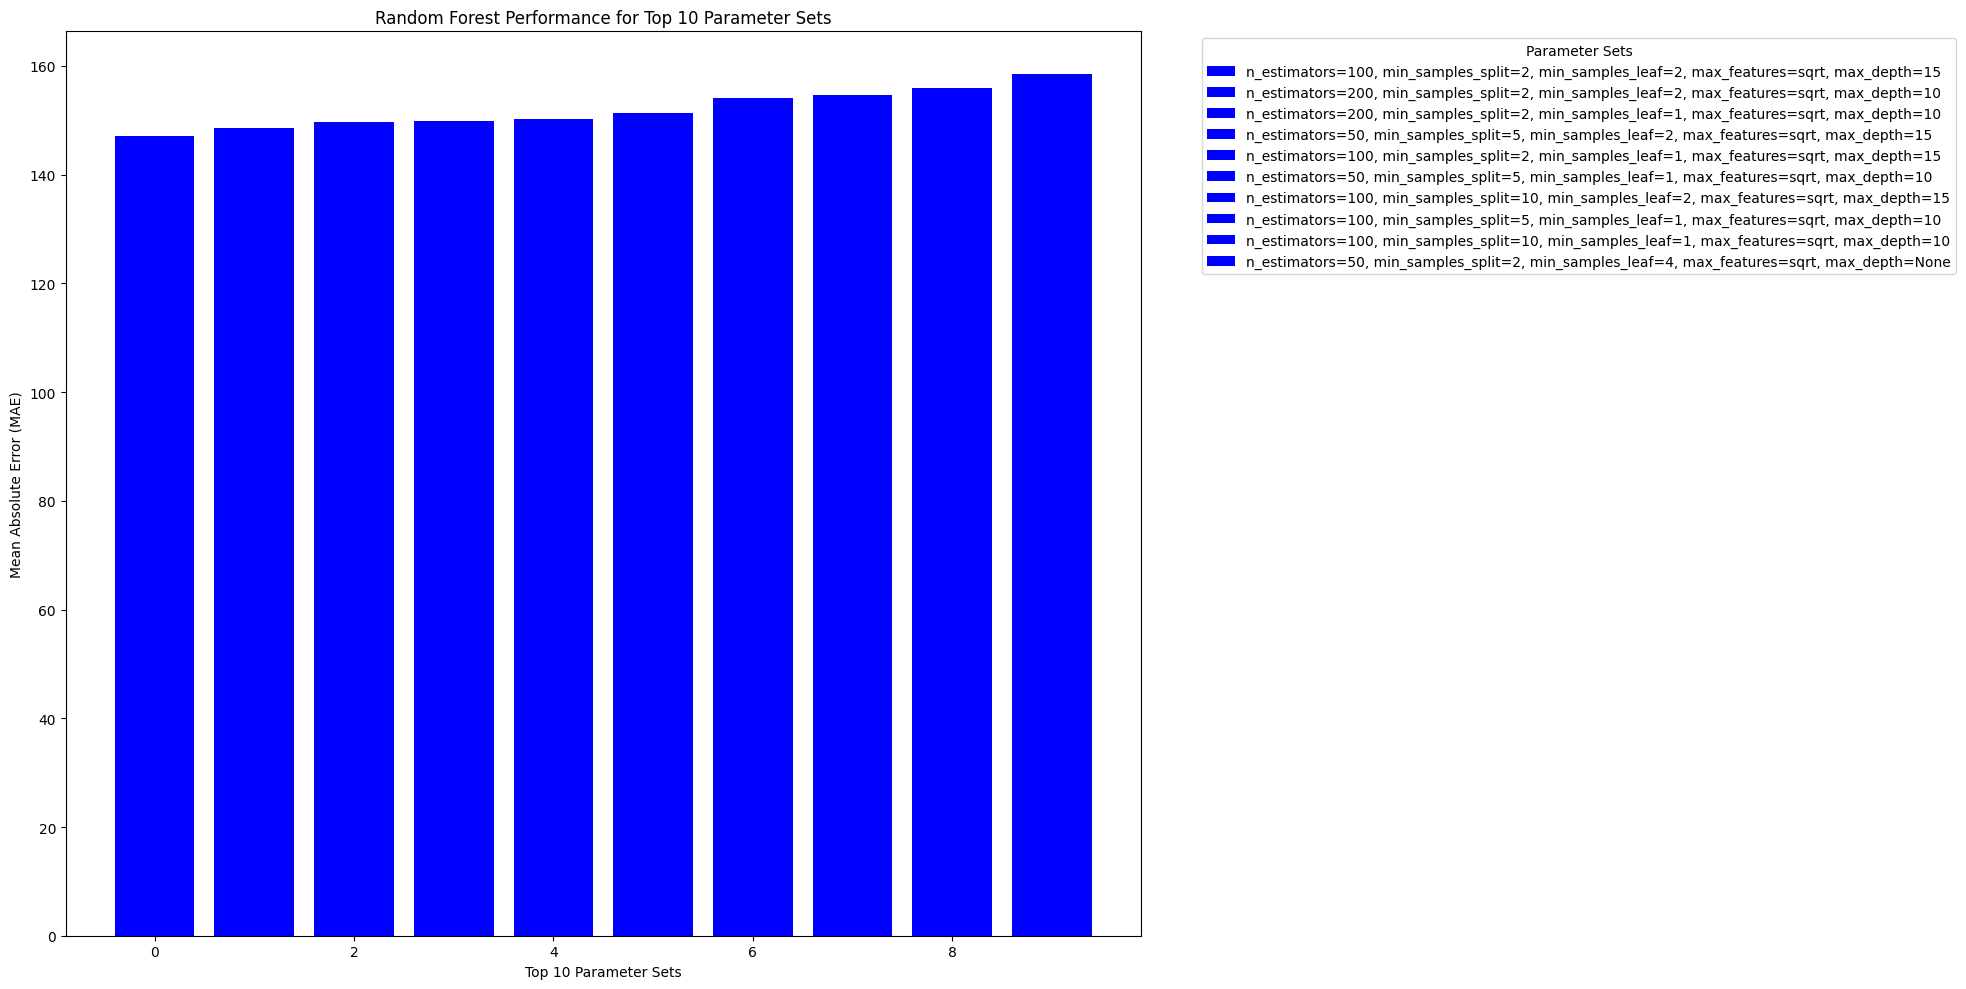

In [ ]:
plot_model_performance_with_legend(rf_top_params_rf, 'Random Forest', abbreviate_params)

In [ ]:
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error


rf = RandomForestRegressor(max_depth=20, min_samples_leaf=1, min_samples_split=2,
                      n_estimators=100,max_features='sqrt', random_state=42)

start_time = time.time()
rf.fit(x_train, y_train)
end_time = time.time()

rf_time = end_time - start_time
print(f"Random Forest Training Time: {rf_time:.4f} seconds")

Random Forest Training Time: 2.8734 seconds


###Evaluating  the validation set

In [ ]:

y_val_pred = rf.predict(x_val)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = np.sqrt(val_mse)
val_r2 = r2_score(y_val, y_val_pred)

print("Validation Results:")
print(f"MAE: {val_mae:.4f}, MSE: {val_mse:.4f}, RMSE: {val_rmse:.4f}, R²: {val_r2:.4f}")

Validation Results:
MAE: 24.2016, MSE: 2338.7493, RMSE: 48.3606, R²: 0.9977


###Evaluating the Test Data

In [ ]:

y_test_pred = rf.predict(x_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTesting Results:")
print(f"MAE: {test_mae:.4f}, MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, R²: {test_r2:.4f}")


Testing Results:
MAE: 81.0856, MSE: 91162.3549, RMSE: 301.9310, R²: 0.7713


##XGBoost HyperParameter

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# Creating a smaller subset of the data
subset_fraction = 0.1  # Adjust this as needed
x_train_subset = x_train.sample(frac=subset_fraction, random_state=42)
y_train_subset = y_train.loc[x_train_subset.index]

# Splitting the dataset into training and validation sets
x_train_final, x_val, y_train_final, y_val = train_test_split(x_train_subset, y_train_subset, test_size=0.2, random_state=42)

# Defining your parameter grid for XGBoost
xgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.5, 0.75, 1.0],
}

# Initializing the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Performing Randomized Search with Cross-Validation
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_grid,
    n_iter=50,
    cv=3,
    n_jobs=-1,
    scoring='neg_mean_absolute_error',
    verbose=2,
    random_state=42
)

# Fit the model
xgb_random_search.fit(x_train_final, y_train_final)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.5, 0.75, 1.0]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

### Training the XGBoost with the best **hyperparameters**

In [ ]:
# Getting the best parameters and the corresponding score
best_xgb_params = xgb_random_search.best_params_
best_xgb_score = -xgb_random_search.best_score_
# Output the best parameters and best score
print("Best XGBoost Parameters:", best_xgb_params)
print("Best XGBoost Score (MAE):", best_xgb_score)

# Fitting the best model on the entire training set
best_xgb_model = xgb.XGBRegressor(**best_xgb_params, objective='reg:squarederror', random_state=42)
best_xgb_model.fit(x_train_final, y_train_final)

# Evaluating on validation set
val_predictions = best_xgb_model.predict(x_val)
val_mae = mean_absolute_error(y_val, val_predictions)

# Output the validation MAE
print("Validation MAE:", val_mae)

Best XGBoost Parameters: {'subsample': 1.0, 'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.2}
Best XGBoost Score (MAE): 131.5693299396956
Validation MAE: 124.88881105321249


In [ ]:
# XGBoost results
xgb_results = pd.DataFrame(xgb_random_search.cv_results_)
xgb_top_params_xgb = xgb_results.nlargest(10, 'mean_test_score')[['params', 'mean_test_score']]
xgb_top_params_xgb['MAE'] = -xgb_top_params_xgb['mean_test_score']

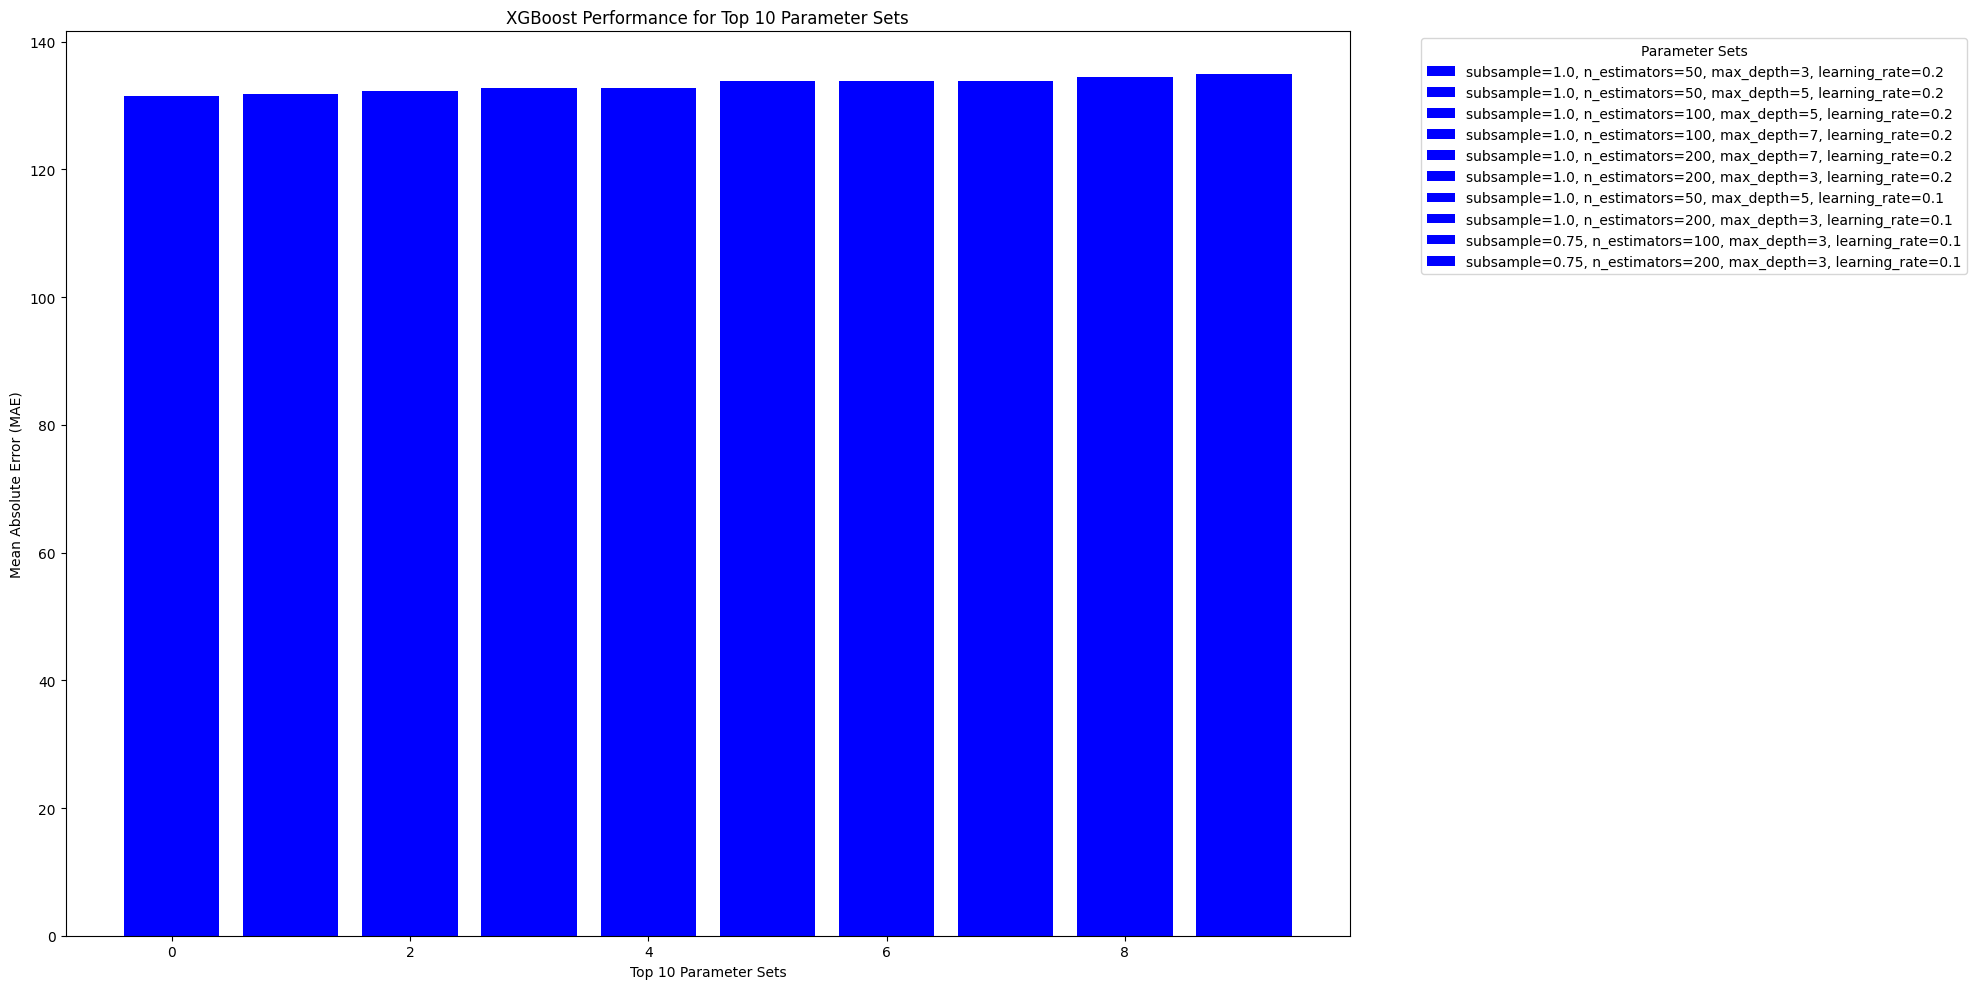

In [ ]:
plot_model_performance_with_legend(xgb_top_params_xgb, 'XGBoost',abbreviate_params)

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

xg_reg = xgb.XGBRegressor(objective='reg:squarederror',
                         colsample_bytree=0.8, # colsample_bytree for more feature diversity
                         learning_rate=0.01,   # learning_rate for more stable convergence
                         max_depth=6,          # max_depth to prevent overfitting
                         n_estimators=1000,    # n_estimators for better model capacity
                         min_child_weight=10,  # min_child_weight to prevent overfitting
                         gamma=0.5,            # gamma to encourage more splits
                         subsample=0.9,        # subsample for better regularization
                         reg_alpha=1,          # reg_alpha for L1 regularization
                         reg_lambda=2,         # reg_lambda for L2 regularization
                         random_state=42)


start_time = time.time()
xg_reg.fit(x_train, y_train)
end_time = time.time()

xgboost_time = end_time - start_time
print(f"XgBoost Training Time: {xgboost_time:.4f} seconds")

XgBoost Training Time: 4.1063 seconds


###Evaluating Test Data

In [ ]:
# Predicting on test set (assuming test data is prepared similarly)
y_test_pred_xgb = xg_reg.predict(x_test)

# Evaluating on test set
test_mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)
test_mse_xgb = mean_squared_error(y_test, y_test_pred_xgb)
test_rmse_xgb = np.sqrt(test_mse_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

print("\nTest Results for XGBoost:")
print(f"MAE: {test_mae_xgb:.4f}, MSE: {test_mse_xgb:.4f}, RMSE: {test_rmse_xgb:.4f}, R²: {test_r2_xgb:.4f}")


Test Results for XGBoost:
MAE: 96.5249, MSE: 114548.7142, RMSE: 338.4505, R²: 0.7126


###Evaluating the validation set

In [ ]:
# Predicting on validation set
y_val_pred_xgb = xg_reg.predict(x_val)

# Evaluating on validation set
val_mae_xgb = mean_absolute_error(y_val, y_val_pred_xgb)
val_mse_xgb = mean_squared_error(y_val, y_val_pred_xgb)
val_rmse_xgb = np.sqrt(val_mse_xgb)
val_r2_xgb = r2_score(y_val, y_val_pred_xgb)

print("Validation Results for XGBoost:")
print(f"MAE: {val_mae_xgb:.4f}, MSE: {val_mse_xgb:.4f}, RMSE: {val_rmse_xgb:.4f}, R²: {val_r2_xgb:.4f}")

Validation Results for XGBoost:
MAE: 74.1279, MSE: 33431.5119, RMSE: 182.8429, R²: 0.9677


##Light Gradient Boosting


###Training the Light Gradient Boosting with the best hyperparameters



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error

# Creating a smaller subset of the data
subset_fraction = 0.1  # Adjust this as needed
X_train_subset = x_train.sample(frac=subset_fraction, random_state=42)
y_train_subset = y_train.loc[x_train_subset.index]

# Splitting the dataset into training and validation sets
x_train_final, x_val, y_train_final, y_val = train_test_split(x_train_subset, y_train_subset, test_size=0.2, random_state=42)

# Defining your parameter grid for LightGBM
lgb_param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100],
    'n_estimators': [50, 100, 200],
    'max_depth': [-1, 5, 10, 15],
    'subsample': [0.5, 0.75, 1.0],
}

# Initializing the LightGBM model
lgb_model = lgb.LGBMRegressor(random_state=42)

# Performing Randomized Search with Cross-Validation
lgb_random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=lgb_param_grid,
    n_iter=50,
    cv=3,
    n_jobs=-1,
    scoring='neg_mean_absolute_error',
    verbose=2,
    random_state=42
)

# Fitting the model
lgb_random_search.fit(x_train_final, y_train_final)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 616
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 6
[LightGBM] [Info] Start training from score 275.492710
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(random_state=42), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [-1, 5, 10, 15],
                                        'n_estimators': [50, 100, 200],
                                        'num_leaves': [31, 50, 100],
                                        'subsample': [0.5, 0.75, 1.0]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [ ]:
# Getting the best parameters and the corresponding score
best_lgb_params = lgb_random_search.best_params_
best_lgb_score = -lgb_random_search.best_score_  # Negate because we used neg_mean_absolute_error

# Output the best parameters and best score
print("Best LightGBM Parameters:", best_lgb_params)
print("Best LightGBM Score (MAE):", best_lgb_score)

# Fitting the best model on the entire training set
best_lgb_model = lgb.LGBMRegressor(**best_lgb_params, random_state=42)
best_lgb_model.fit(x_train_final, y_train_final)

# Evaluating on validation set
val_predictions_lgb = best_lgb_model.predict(x_val)
val_mae_lgb = mean_absolute_error(y_val, val_predictions_lgb)

# Output the validation MAE
print("Validation MAE for LightGBM:", val_mae_lgb)

Best LightGBM Parameters: {'subsample': 0.75, 'num_leaves': 100, 'n_estimators': 200, 'max_depth': -1, 'learning_rate': 0.01}
Best LightGBM Score (MAE): 191.9358925949654
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 616
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 6
[LightGBM] [Info] Start training from score 275.492710
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further sp

In [ ]:
# LightGBM results
lgb_results = pd.DataFrame(lgb_random_search.cv_results_)
lgb_top_params_lgb = lgb_results.nlargest(10, 'mean_test_score')[['params', 'mean_test_score']]
lgb_top_params_lgb['MAE'] = -lgb_top_params_lgb['mean_test_score']  # Negate for MAE

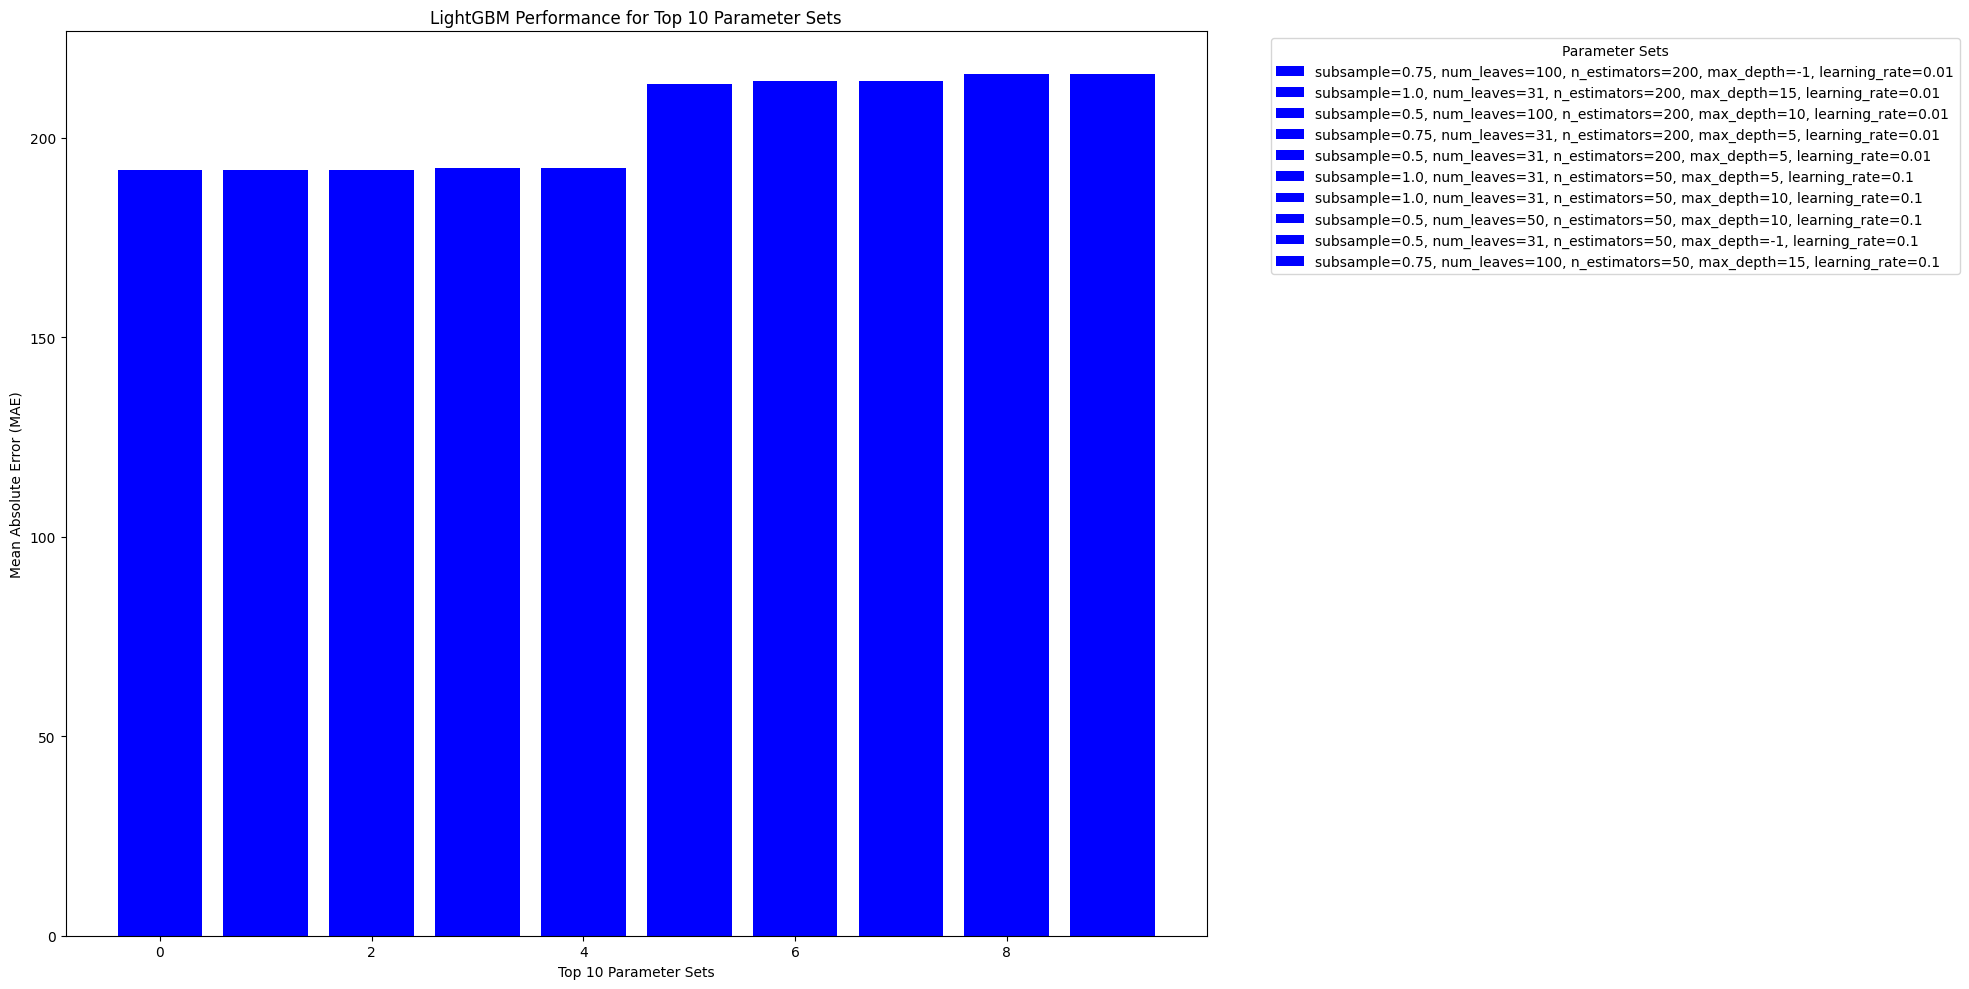

In [ ]:
plot_model_performance_with_legend(lgb_top_params_lgb, 'LightGBM', abbreviate_params)

In [ ]:
import lightgbm as lgb

lgb_reg = lgb.LGBMRegressor(objective='regression',
                           num_leaves=31,
                           learning_rate=0.05,
                           n_estimators=500,
                           max_depth=6,
                           min_child_samples=50,
                           feature_fraction=0.9,
                           bagging_fraction=0.9,
                           reg_alpha=2,
                           reg_lambda=2,
                           random_state=42)



start_time = time.time()
lgb_reg.fit(x_train, y_train)
end_time = time.time()

lgboost_time = end_time - start_time
print(f"Light Gradient Boosting Training Time: {lgboost_time:.4f} seconds")

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000689 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1040
[LightGBM] [Info] Number of data points in the train set: 5996, number of used features: 6
[LightGBM] [Info] Start training from score 223.492463
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

###Evaluating the validation set

In [ ]:
# Predicting on validation set
y_val_pred_lgb = lgb_reg.predict(x_val)

# Evaluating on validation set
val_mae_lgb = mean_absolute_error(y_val, y_val_pred_lgb)
val_mse_lgb = mean_squared_error(y_val, y_val_pred_lgb)
val_rmse_lgb = np.sqrt(val_mse_lgb)
val_r2_lgb = r2_score(y_val, y_val_pred_lgb)

print("Validation Results for LightGBM:")
print(f"MAE: {val_mae_lgb:.4f}, MSE: {val_mse_lgb:.4f}, RMSE: {val_rmse_lgb:.4f}, R²: {val_r2_lgb:.4f}")

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
Validation Results for LightGBM:
MAE: 100.7942, MSE: 204842.9837, RMSE: 452.5958, R²: 0.8022


###Evaluating Test Data

In [ ]:
# Predicting on test set
y_test_pred_lgb = lgb_reg.predict(x_test)

# Evaluating on test set
test_mae_lgb = mean_absolute_error(y_test, y_test_pred_lgb)
test_mse_lgb = mean_squared_error(y_test, y_test_pred_lgb)
test_rmse_lgb = np.sqrt(test_mse_lgb)
test_r2_lgb = r2_score(y_test, y_test_pred_lgb)

print("\nTest Results for LightGBM:")
print(f"MAE: {test_mae_lgb:.4f}, MSE: {test_mse_lgb:.4f}, RMSE: {test_rmse_lgb:.4f}, R²: {test_r2_lgb:.4f}")

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9

Test Results for LightGBM:
MAE: 100.3624, MSE: 119882.6568, RMSE: 346.2407, R²: 0.6992


##Comparing Model Performances

In [ ]:
# Random Forest
val_results_rf = [val_mae, val_mse, val_rmse, val_r2]
test_results_rf = [test_mae, test_mse, test_rmse, test_r2]

# XGBoost
val_results_xgb = [val_mae_xgb, val_mse_xgb, val_rmse_xgb, val_r2_xgb]
test_results_xgb = [test_mae_xgb, test_mse_xgb, test_rmse_xgb, test_r2_xgb]

# LightGBM
val_results_lgb = [val_mae_lgb, val_mse_lgb, val_rmse_lgb, val_r2_lgb]
test_results_lgb = [test_mae_lgb, test_mse_lgb, test_rmse_lgb, test_r2_lgb]

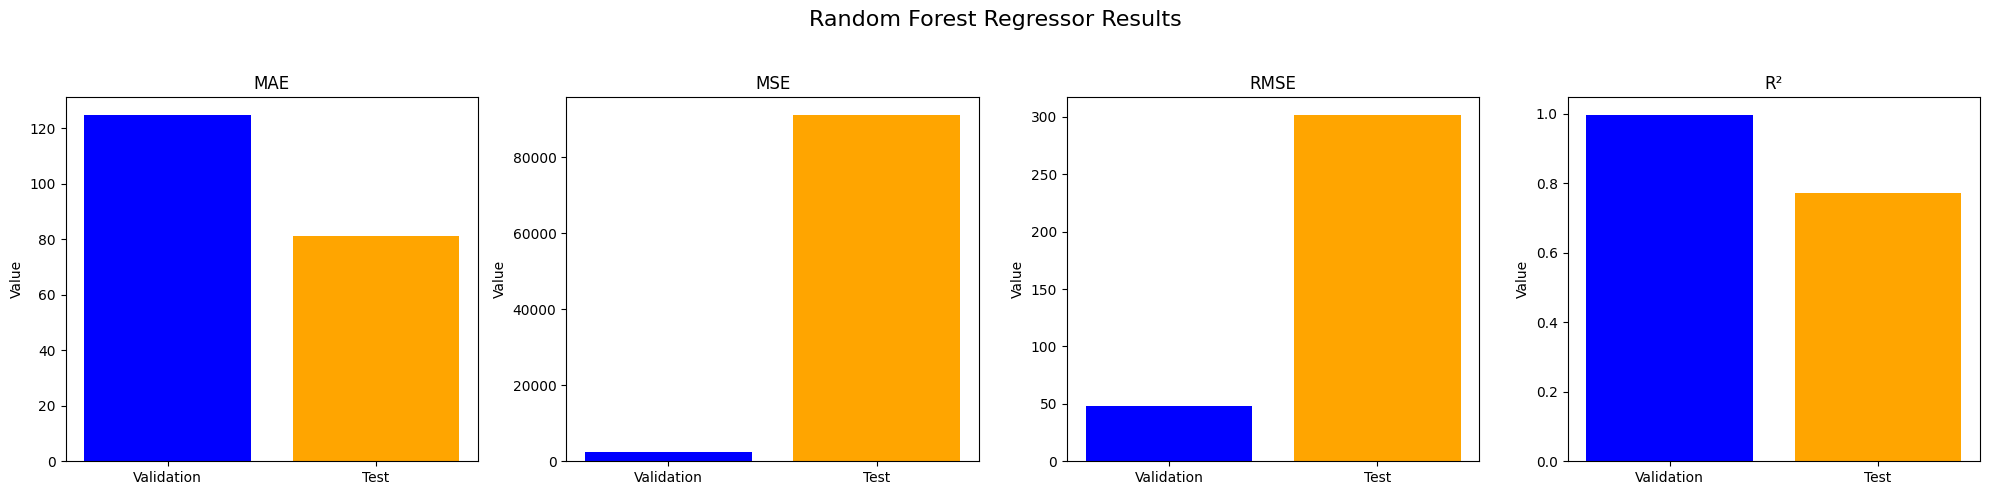

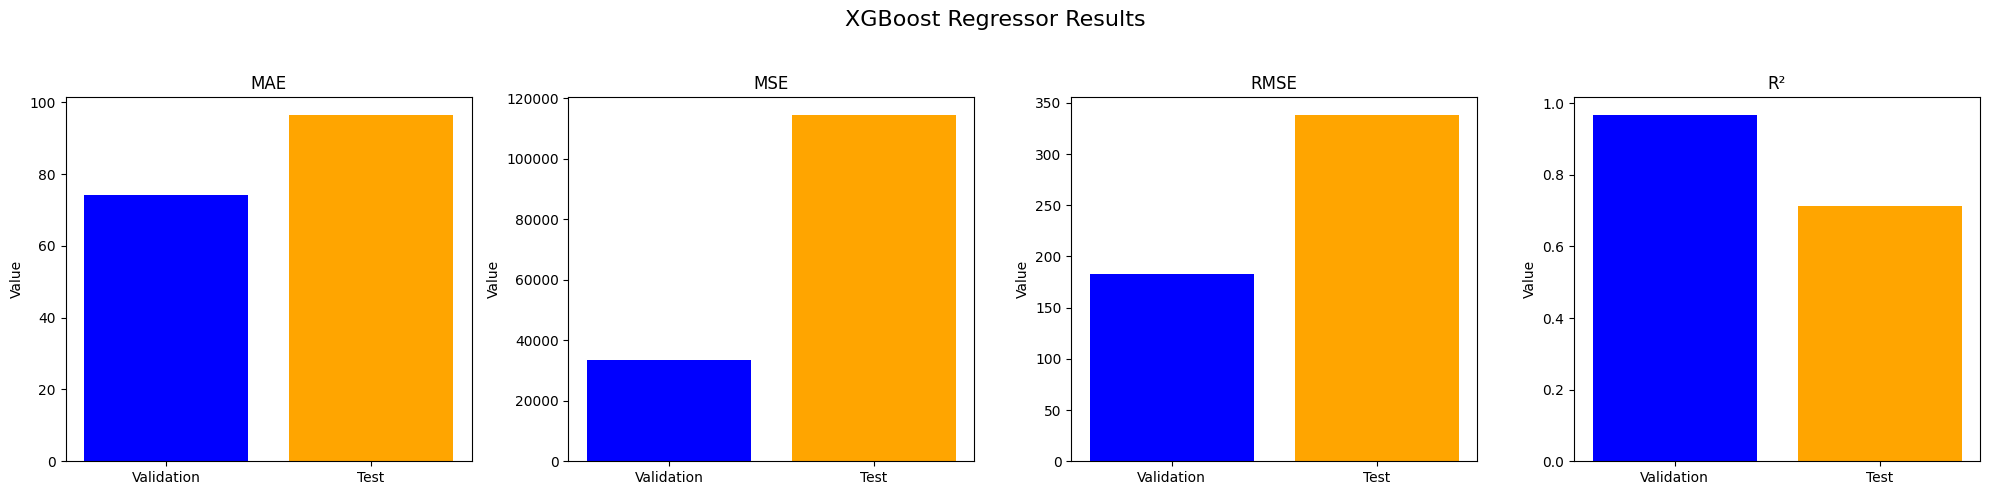

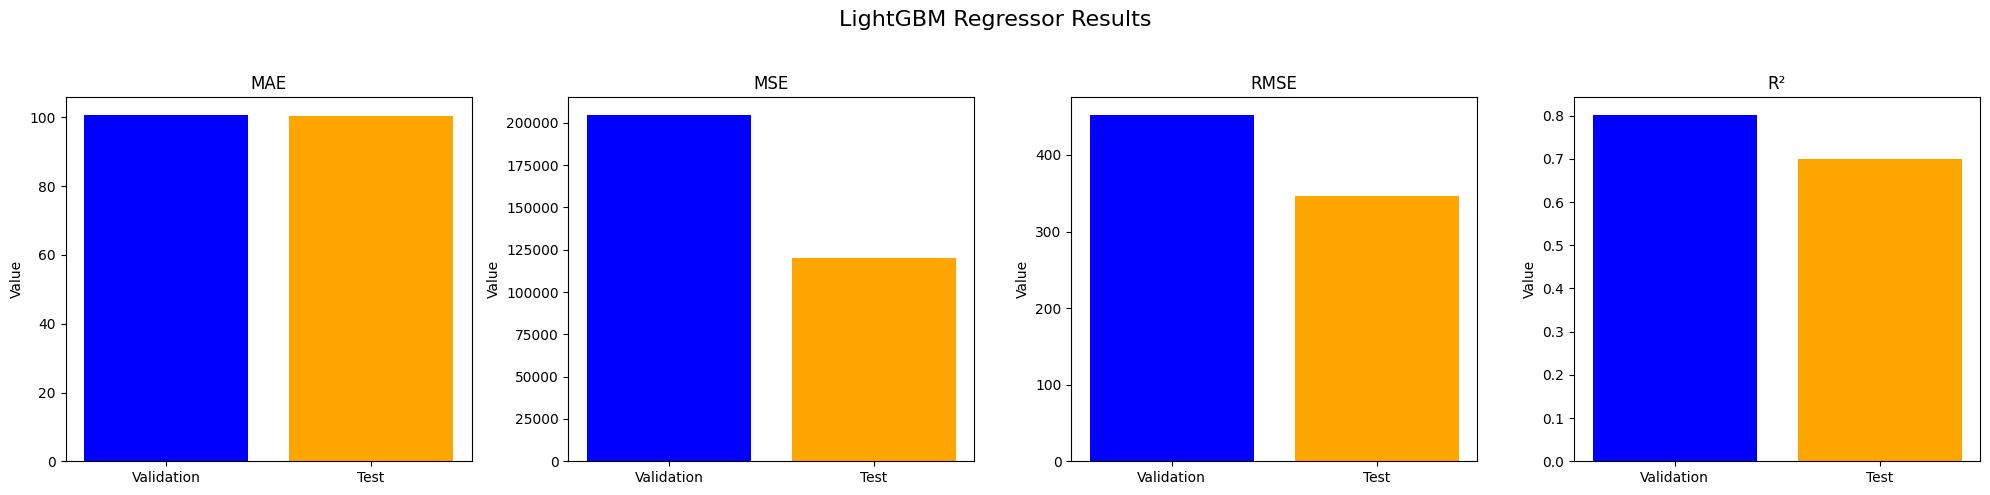

In [ ]:
import matplotlib.pyplot as plt

# Function to plot results for each model
def plot_compact_results(val_results, test_results, model_name):
    labels = ['Validation', 'Test']
    metrics = ['MAE', 'MSE', 'RMSE', 'R²']

    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    fig.suptitle(f'{model_name} Results', fontsize=16)

    for i, metric in enumerate(metrics):
        ax = axes[i]
        val_metric = val_results[i]
        test_metric = test_results[i]

        ax.bar(labels, [val_metric, test_metric], color=['blue', 'orange'])
        ax.set_title(metric)
        ax.set_ylabel('Value')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# Plotting for each model
plot_compact_results(val_results_rf, test_results_rf, 'Random Forest Regressor')
plot_compact_results(val_results_xgb, test_results_xgb, 'XGBoost Regressor')
plot_compact_results(val_results_lgb, test_results_lgb, 'LightGBM Regressor')

For the Random Forest Regressor,

*    the MAE of the test data is around 80 which is less than the MAE of the validation data which is greater than 120.

*   the MSE of the test data is less than 20,000 which is significantly lower than the MSE of the validation data which is greater than 100,000.

*   the RMSE of the test data is about 120 which is less than the RMSE of the validation data which is greater than 300.
*   the R2 of the test data





In [ ]:
# Creating a DataFrame for each model
rf_df = pd.DataFrame({
    'Model': 'Random Forest',
    'MAE': test_mae,
    'MSE': test_mse,
    'RMSE': test_rmse,
    'R²': test_r2
}, index=[0])

xgb_df = pd.DataFrame({
    'Model': 'XGBoost',
    'MAE': test_mae_xgb,
    'MSE': test_mse_xgb,
    'RMSE': test_rmse_xgb,
    'R²': test_r2_xgb
}, index=[0])

lgb_df = pd.DataFrame({
    'Model': 'LightGBM',
    'MAE': test_mae_lgb,
    'MSE': test_mse_lgb,
    'RMSE': test_rmse_lgb,
    'R²': test_r2_lgb
}, index=[0])

# Concatenating all DataFrames into one
all_results_df = pd.concat([rf_df, xgb_df, lgb_df], ignore_index=True)

In [ ]:
all_results_df

,Model,MAE,MSE,RMSE,R²
0,Random Forest,81.085570,91162.354892,301.931043,0.771269
1,XGBoost,96.524861,114548.714185,338.450460,0.712592
2,LightGBM,100.362417,119882.656845,346.240750,0.699208


Comparing all the model performances:


*   The random forest regression model is the overall best performing model because it has the lowest MAE and RMSE values as well as the highest MSE and R2 values. It has the lowest prediction errors and the highest explanatory power, making it the most accurate and reliable model among the three.


